###  Distorted-MNIST $\to$ MNIST

In [2]:
from DynGenModels.configs.registered_experiments import Config_MNIST_UNet_CondFlowMatch
from DynGenModels.models.experiment import Experiment

path = '../../results/distorted_mnist.ConditionalFlowMatching.Unet.2024.02.13_21h13'
exp = Experiment(Config_MNIST_UNet_CondFlowMatch, path=path, DEVICE='cuda:2')
exp.load()

+---------------------+-------------------------+
| Parameters          | Values                  |
+---------------------+-------------------------+
| NAME                | distorted_mnist         |
| DATA_SOURCE         | distorted_mnist         |
| DATA_TARGET         | mnist                   |
| DIM_INPUT           | 784                     |
| INPUT_SHAPE         | [1, 28, 28]             |
| DEVICE              | cuda:0                  |
| OPTIMIZER           | Adam                    |
| LR                  | 0.0001                  |
| WEIGHT_DECAY        | 0.0                     |
| OPTIMIZER_BETAS     | [0.9, 0.999]            |
| OPTIMIZER_EPS       | 1e-08                   |
| OPTIMIZER_AMSGRAD   | False                   |
| GRADIENT_CLIP       |                         |
| SCHEDULER           |                         |
| SCHEDULER_T_MAX     |                         |
| SCHEDULER_ETA_MIN   |                         |
| SCHEDULER_GAMMA     |                         |


2024-02-14 18:57:14.737969: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-14 18:57:14.781337: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-14 18:57:14.782718: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-14 18:57:15.549913: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO: building dataloaders...
INFO: train/val/test split ratios: 1.0/0.0/0.0
INFO: train size: 60000, validation size: 0, testing sizes: 0


In [ ]:
exp.generate_samples(input_source=exp.dataset.source_test[100:120])

### Display results

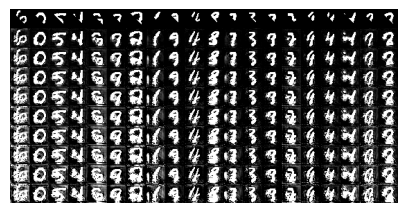

In [5]:
from utils import plot_image_evolution
plot_image_evolution(exp.pipeline, nrow=20, figsize=(5, 5))